In [91]:
import numpy as np
import pandas as pd 
import seaborn as sn
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import confusion_matrix

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge

from sklearn.preprocessing import PolynomialFeatures

In [40]:
import pickle
import warnings

warnings.filterwarnings('ignore')

In [41]:
df = pd.read_csv("train.csv")

In [42]:
df.shape

(71, 2)

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Age     71 non-null     int64
 1   Height  71 non-null     int64
dtypes: int64(2)
memory usage: 1.2 KB


In [44]:
df.describe()

,Age,Height
count,71.000000,71.000000
mean,45.000000,160.873239
std,20.639767,20.842902
min,10.000000,138.000000
25%,27.500000,143.500000
50%,45.000000,155.000000
75%,62.500000,171.500000
max,80.000000,208.000000


In [45]:
df.head()

,Age,Height
0,10,138
1,11,138
2,12,138
3,13,139
4,14,139


In [46]:
df.isna().sum()

Age       0
Height    0
dtype: int64

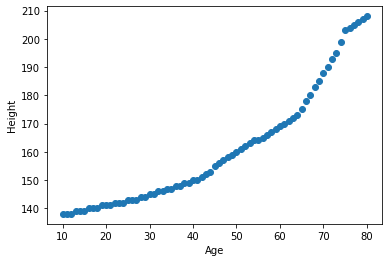

In [47]:
plt.xlabel('Age')
plt.ylabel('Height')
plt.scatter(df.Age,df.Height)

In [56]:
X = df[["Age"]].values
Y = df[["Height"]].values

In [57]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [58]:
model = LinearRegression()

In [63]:
model.fit(X_train,Y_train)

LinearRegression()

In [64]:
print(model.score(X_test,Y_test))
print(model.score(X_train,Y_train))

0.8449933844728846
0.9018844414635662


In [117]:
lasso_reg = Lasso(alpha=10,max_iter=5000,tol=0.2)

In [118]:
lasso_reg.fit(X_train,Y_train)

Lasso(alpha=10, max_iter=5000, tol=0.2)

In [119]:
print(lasso_reg.score(X_test,Y_test))
print(lasso_reg.score(X_train,Y_train))

0.8548216206883306
0.9013851582474112


In [120]:
ridge_reg = Ridge(alpha=10,max_iter=1000,tol=0.1)

In [121]:
ridge_reg.fit(X_train,Y_train)

Ridge(alpha=10, max_iter=1000, tol=0.1)

In [122]:
print(ridge_reg.score(X_test,Y_test))
print(ridge_reg.score(X_train,Y_train))

0.8451805688398514
0.9018842866072543


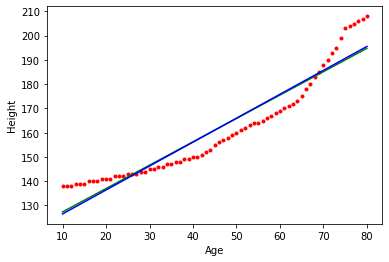

In [123]:
plt.xlabel('Age')
plt.ylabel('Height')
plt.scatter(df.Age,df.Height,color="red",marker='.')
plt.plot(df.Age,lasso_reg.predict(df[['Age']].values),color='green')
plt.plot(df.Age,ridge_reg.predict(df[['Age']].values),color='blue')